In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

### Introducción
Vamos a usar un dataset que tiene para diferentes personas las siguientes variables:
- Costo de seguro de salud / Obra social
- Edad
- Sexo
- BMI - Indice de masa corporal
- Cantidad de hijos
- Fumador
- Región

#### Carga el dataset

In [25]:
data = pd.read_csv('insurance.csv')

In [26]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [27]:
data.isnull().values.any()

False

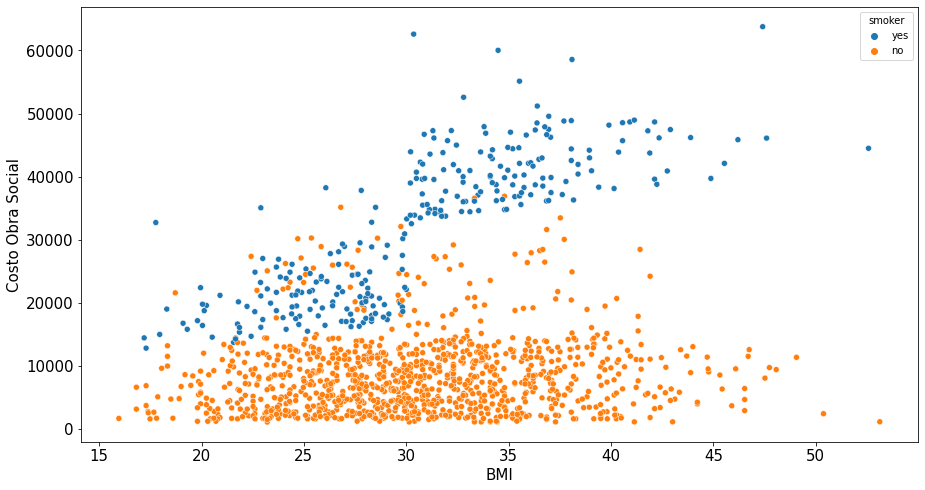

In [5]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x='bmi',y='charges', data=data, hue='smoker')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('BMI',fontsize = 15)
plt.ylabel('Costo Obra Social',fontsize = 15);

#### Modelo para fumadores

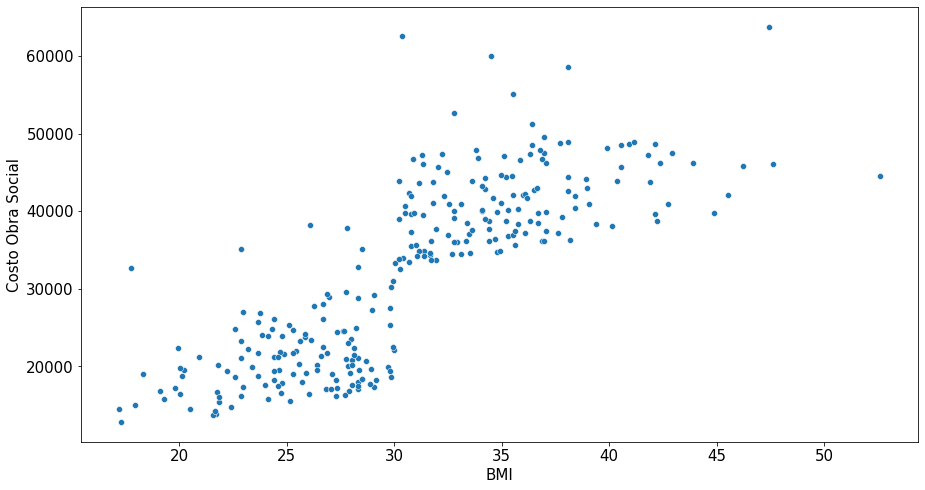

In [28]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='bmi',y='charges',data=data[data['smoker']=='yes'])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('BMI',fontsize = 15)
plt.ylabel('Costo Obra Social',fontsize = 15);

In [29]:
fumadores = data[data['smoker']=='yes'].copy()
mod_fumadores = smf.ols(formula='charges ~ bmi', data=fumadores)
res_fumadores = mod_fumadores.fit()
print(res_fumadores.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     506.1
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           5.02e-64
Time:                        22:28:15   Log-Likelihood:                -2807.2
No. Observations:                 274   AIC:                             5618.
Df Residuals:                     272   BIC:                             5626.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.319e+04   2052.885     -6.423      0.0

In [30]:
type(mod_fumadores)

statsmodels.regression.linear_model.OLS

In [31]:
type(res_fumadores)

statsmodels.regression.linear_model.RegressionResultsWrapper

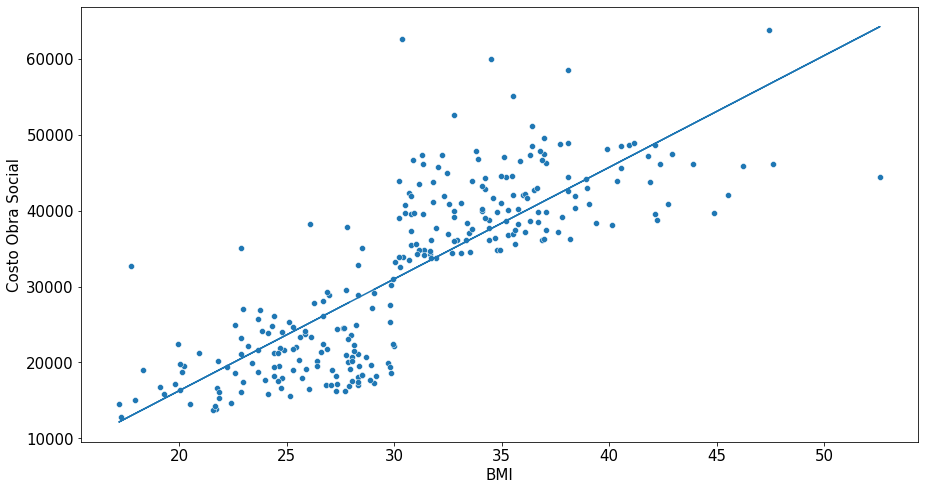

In [32]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='bmi',y='charges', data = fumadores)
plt.plot(fumadores['bmi'], res_fumadores.predict(fumadores['bmi']))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('BMI',fontsize = 15)
plt.ylabel('Costo Obra Social',fontsize = 15);

#### Chequeo
Cuando arrancamos a usar un paquete que nunca usamos es importante hacer algunas verificaciones para saber que estamos usando el paquete de la forma correcta

In [33]:
b = ((len(fumadores)*sum(fumadores['bmi']*fumadores['charges'])) - (sum(fumadores['bmi'])*sum(fumadores['charges'])))/((len(fumadores)*sum(fumadores['bmi']**2)) - (sum(fumadores['bmi'])**2))
b

1473.106254701455

In [34]:
a = (sum(fumadores['charges']) - b*sum(fumadores['bmi']))/len(fumadores)
a

-13186.57632276401

#### Moelo para no fumadores

In [35]:
no_fumadores = data[data['smoker']=='no'].copy()
mod_nofumadores = smf.ols(formula='charges ~ bmi', data=no_fumadores)
res_nofumadores = mod_nofumadores.fit()
print(res_nofumadores.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     7.553
Date:                Mon, 19 Dec 2022   Prob (F-statistic):            0.00609
Time:                        22:30:48   Log-Likelihood:                -10761.
No. Observations:                1064   AIC:                         2.153e+04
Df Residuals:                    1062   BIC:                         2.154e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5879.4241    947.475      6.205      0.0

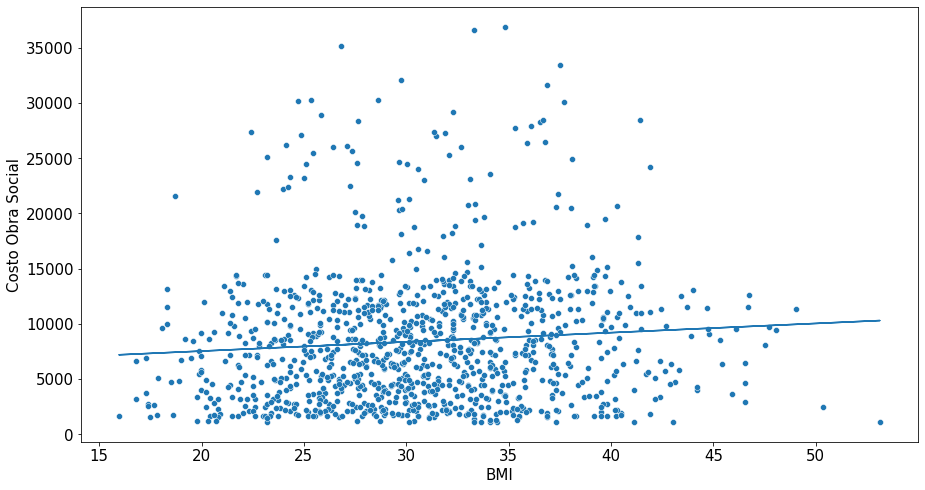

In [36]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='bmi',y='charges',data =no_fumadores)
plt.plot(no_fumadores['bmi'], res_nofumadores.predict(no_fumadores['bmi']))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('BMI',fontsize = 15)
plt.ylabel('Costo Obra Social',fontsize = 15);

#### Modelo para todos los datos

In [37]:
mod = smf.ols(formula='charges ~ bmi', data=data)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     54.71
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           2.46e-13
Time:                        22:31:20   Log-Likelihood:                -14451.
No. Observations:                1338   AIC:                         2.891e+04
Df Residuals:                    1336   BIC:                         2.892e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1192.9372   1664.802      0.717      0.4

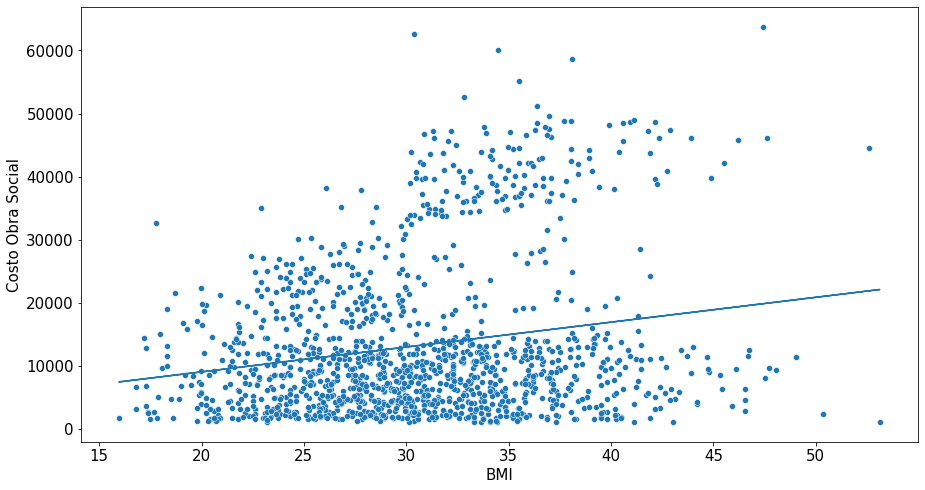

In [38]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='bmi',y='charges',data =data)
plt.plot(data['bmi'], res.predict(data['bmi']))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('BMI',fontsize = 15)
plt.ylabel('Costo Obra Social',fontsize = 15);

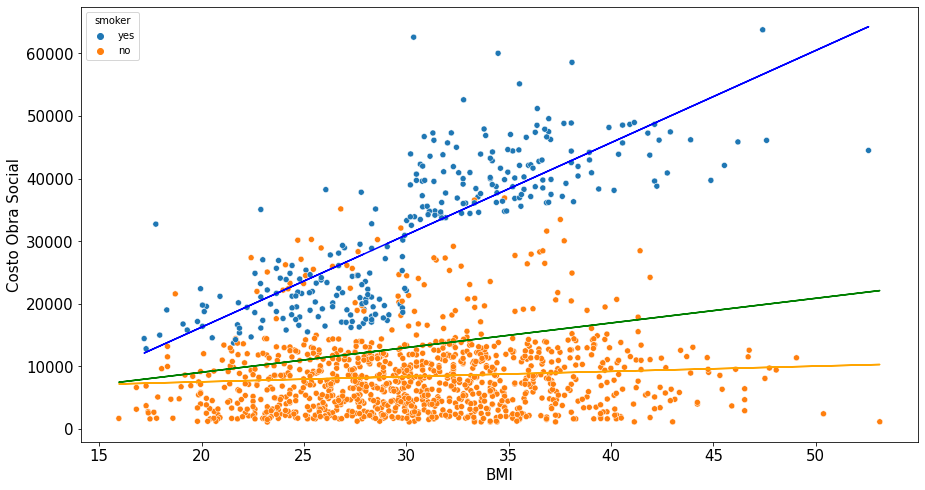

In [39]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='bmi',y='charges',data =data, hue = 'smoker')
plt.plot(fumadores['bmi'], res_fumadores.predict(fumadores['bmi']), color = 'blue')
plt.plot(no_fumadores['bmi'], res_nofumadores.predict(no_fumadores['bmi']), color = 'orange')
plt.plot(data['bmi'], res.predict(data['bmi']), color = 'green')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('BMI',fontsize = 15)
plt.ylabel('Costo Obra Social',fontsize = 15);

#### Un modelo final con varias variables

In [18]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [19]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [40]:
# convertimos las variables categóricas
data['fem_dummy'] = 0
data.loc[data['sex']=='female', 'fem_dummy'] = 1
for region in ['southwest', 'southeast', 'northwest']:
  data[region] = 0
  data.loc[data['region']==region, region] = 1

In [41]:
data.head()

,age,sex,bmi,children,smoker,region,charges,fem_dummy,southwest,southeast,northwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,1,0,0
1,18,male,33.770,1,no,southeast,1725.55230,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0,0,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,0,0,1


In [42]:
mod = smf.ols(formula='charges ~ bmi + age + fem_dummy + southwest + southeast + northwest', data=data)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     31.22
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           3.04e-35
Time:                        22:33:37   Log-Likelihood:                -14390.
No. Observations:                1338   AIC:                         2.879e+04
Df Residuals:                    1331   BIC:                         2.883e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4740.3040   1847.570     -2.566      0.0

#### Interpretación de coeficientes
- Cuando aumenta el BMI aumenta el costo del seguro de salud
- Cuando aumenta la edad auenta el costo del seguro de salud
- Si sos mujer el seguro es más barato
- Si sos de Southwest el seguro es más barato

In [30]:
# convertimos las variables categóricas
data['fem_dummy'] = 0
data.loc[data['sex']=='female', 'fem_dummy'] = 1
data['male_dummy'] = 0
data.loc[data['sex']=='male', 'male_dummy'] = 1
for region in ['southwest', 'southeast', 'northwest', 'northeast']:
  data[region] = 0
  data.loc[data['region']==region, region] = 1

In [32]:
mod = smf.ols(formula='charges ~ bmi + age + fem_dummy + male_dummy + southwest + southeast + northwest + northeast', data=data)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     31.22
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           3.04e-35
Time:                        21:36:58   Log-Likelihood:                -14390.
No. Observations:                1338   AIC:                         2.879e+04
Df Residuals:                    1331   BIC:                         2.883e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3441.2696   1023.758     -3.361      0.0

In [28]:
data[data['northweast']]

,age,sex,bmi,children,smoker,region,charges,fem_dummy,southwest,southeast,northwest,northweast,male_dummy
0,19,female,27.900,0,yes,southwest,16884.92400,1,1,0,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,0,0,1,0,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,0,1,0,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,0,0,1,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,0,0,1,0,1
